<a href="https://colab.research.google.com/github/seoboran/pandas_edu/blob/master/200824_pandas_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신종 코로나 바이러스 COVID-19 데이터 분석

In [ ]:
from google.colab import drive

ROOT = "/content/drive"     
print(ROOT)               
drive.mount(ROOT)         

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
%ls

 0818_iris_sample.ipynb
 200820_cross_val.ipynb
 200820_house_price_Handling.ipynb
 200820_lightgbm.ipynb
 200821_lightgbm.ipynb
 200821_lightgbm_new.ipynb
 200821_seaborn_basic_tutorial.ipynb
'200821_seaborn_tutorial 정리.ipynb'
'200824_pandas 연습.ipynb'
 Chapter_4_2_cross_val.ipynb
'Chapter_4_3_lightgbm (1).ipynb'
 Chapter_4_3_lightgbm.ipynb
'Copy of Chapter_4_4_classification_titanic_example.ipynb'
 deeplearningAI/
 disaster/
'final_classification_titanic_example (1).ipynb'
 final_classification_titanic_example.ipynb
 mf_project/
 patient.csv
 sample_submission.csv
'seaborn_basic_tutorial (1).ipynb'
 seaborn_basic_tutorial.ipynb
 test.csv
 train.csv
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled.ipynb


In [ ]:
import pandas as pd


df= pd.read_csv('patient.csv')

In [ ]:
df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6284 non-null   float64
 1   sex               421 non-null    object 
 2   birth_year        408 non-null    float64
 3   country           6283 non-null   object 
 4   region            409 non-null    object 
 5   group             83 non-null     object 
 6   infection_reason  146 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    50 non-null     float64
 10  confirmed_date    6284 non-null   object 
 11  released_date     38 non-null     object 
 12  deceased_date     23 non-null     object 
 13  state             6284 non-null   object 
dtypes: float64(5), object(9)
memory usage: 687.5+ KB


In [ ]:
df.describe()

,id,birth_year,infection_order,infected_by,contact_number
count,6284.000000,408.000000,35.000000,70.000000,50.000000
mean,3142.500000,1974.198529,2.285714,379.000000,69.400000
std,1814.178878,17.596133,1.405272,540.247528,182.876338
min,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1571.750000,1960.750000,1.000000,29.250000,3.000000
50%,3142.500000,1974.000000,2.000000,126.000000,15.500000
75%,4713.250000,1988.250000,3.000000,563.250000,44.500000
max,6284.000000,2018.000000,6.000000,2621.000000,1160.000000


In [ ]:
df.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [ ]:
df.shape

(6285, 14)

In [ ]:
df.isnull().sum()

id                     1
sex                 5864
birth_year          5877
country                2
region              5876
group               6202
infection_reason    6139
infection_order     6250
infected_by         6215
contact_number      6235
confirmed_date         1
released_date       6247
deceased_date       6262
state                  1
dtype: int64

In [ ]:
df['country'].value_counts()

Korea       6274
China          8
Mongolia       1
Name: country, dtype: int64

In [ ]:
df['counts']=1
trends=df.groupby('confirmed_date').sum()
trends['deceased']=df.groupby('deceased_date').sum()['counts']
trends.tail()

,id,birth_year,infection_order,infected_by,contact_number,counts,deceased
confirmed_date,,,,,,,
2020-03-01,3909753.0,53471.0,0.0,121.0,23.0,1062,3.0
2020-03-02,2707500.0,19804.0,0.0,0.0,0.0,600,3.0
2020-03-03,2616378.0,13827.0,0.0,0.0,0.0,516,1.0
2020-03-04,2429805.0,2013.0,0.0,0.0,0.0,438,3.0
2020-03-05,3121209.0,0.0,0.0,0.0,0.0,519,NaN


In [ ]:
trends=trends[['counts','deceased','contact_number']]
trends.head()

,counts,deceased,contact_number
confirmed_date,,,
2020-01-20,1,NaN,45.0
2020-01-24,1,NaN,75.0
2020-01-26,1,NaN,16.0
2020-01-27,1,NaN,95.0
2020-01-30,3,NaN,57.0


In [ ]:
trends['total_counts']=trends['counts'].cumsum()
trends.tail()

,level_0,index,confirmed_date,id,birth_year,infection_order,infected_by,contact_number,counts,deceased,total_counts
26,26,26,2020-03-01,3909753.0,53471.0,0.0,121.0,23.0,1062,3.0,4211
27,27,27,2020-03-02,2707500.0,19804.0,0.0,0.0,0.0,600,3.0,4811
28,28,28,2020-03-03,2616378.0,13827.0,0.0,0.0,0.0,516,1.0,5327
29,29,29,2020-03-04,2429805.0,2013.0,0.0,0.0,0.0,438,3.0,5765
30,30,30,2020-03-05,3121209.0,0.0,0.0,0.0,0.0,519,NaN,6284


In [ ]:
trends['decease_ratio']=trends['deceased'].cumsum()/trends['counts'].cumsum()
trends.tail()

,level_0,index,confirmed_date,id,birth_year,infection_order,infected_by,contact_number,counts,deceased,total_counts,decease_ratio
26,26,26,2020-03-01,3909753.0,53471.0,0.0,121.0,23.0,1062,3.0,4211,0.003800
27,27,27,2020-03-02,2707500.0,19804.0,0.0,0.0,0.0,600,3.0,4811,0.003949
28,28,28,2020-03-03,2616378.0,13827.0,0.0,0.0,0.0,516,1.0,5327,0.003754
29,29,29,2020-03-04,2429805.0,2013.0,0.0,0.0,0.0,438,3.0,5765,0.003990
30,30,30,2020-03-05,3121209.0,0.0,0.0,0.0,0.0,519,NaN,6284,NaN


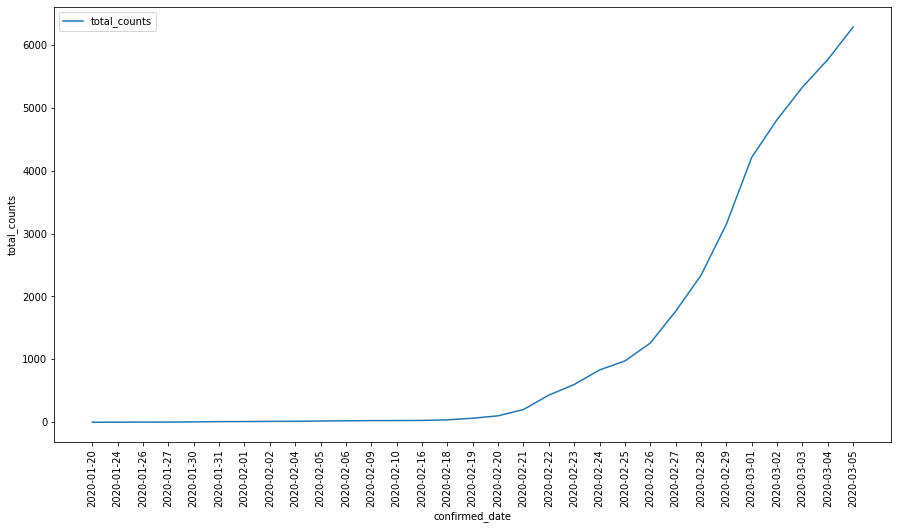

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date',y='total_counts',label='total_counts',data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

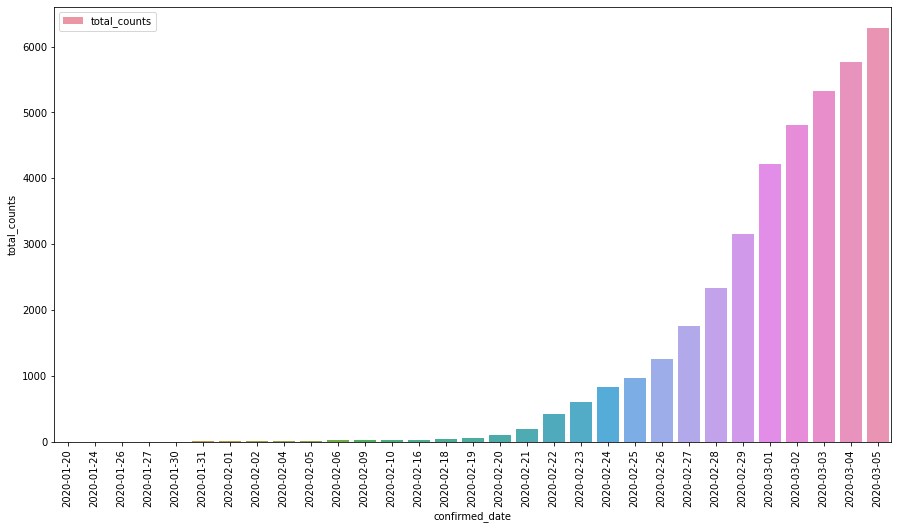

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='confirmed_date',y='total_counts',label='total_counts',data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

No handles with labels found to put in legend.


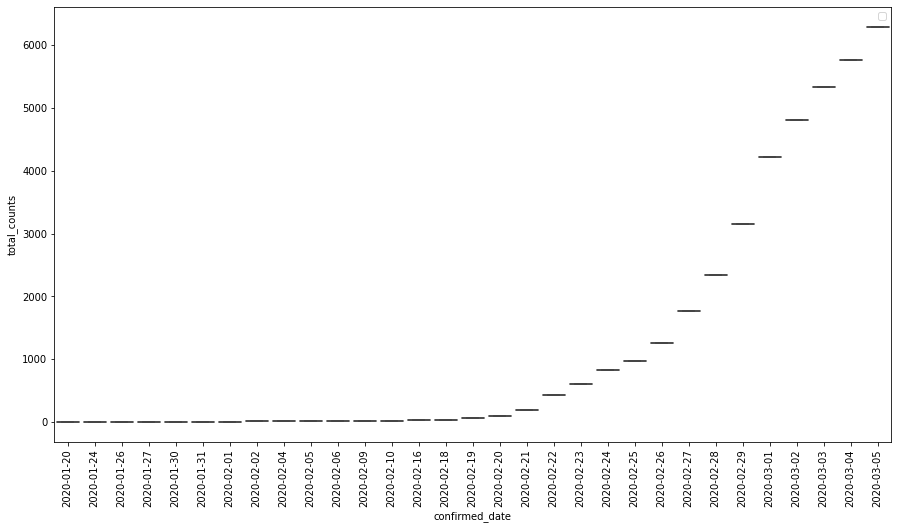

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='confirmed_date',y='total_counts',data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

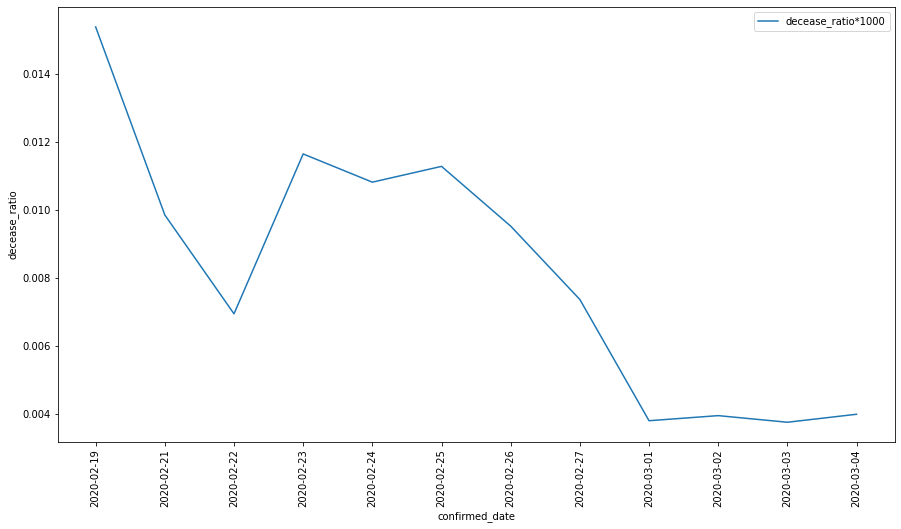

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date',y='decease_ratio',label='decease_ratio*1000',data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

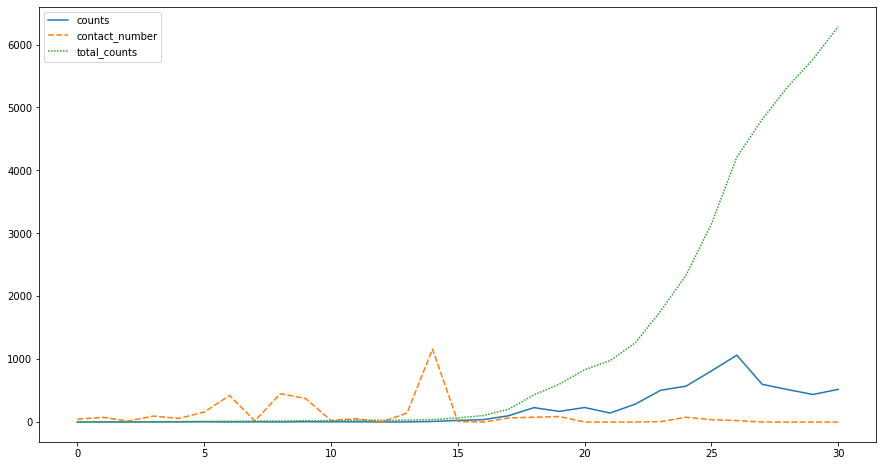

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=trends[['counts','contact_number','total_counts']])
plt.show()

In [ ]:
new_df=df.copy()

In [ ]:
trends.head()

,level_0,index,confirmed_date,id,birth_year,infection_order,infected_by,contact_number,counts,deceased,total_counts,decease_ratio
0,0,0,2020-01-20,1.0,1984.0,1.0,0.0,45.0,1,NaN,1,NaN
1,1,1,2020-01-24,2.0,1964.0,1.0,0.0,75.0,1,NaN,2,NaN
2,2,2,2020-01-26,3.0,1966.0,1.0,0.0,16.0,1,NaN,3,NaN
3,3,3,2020-01-27,4.0,1964.0,1.0,0.0,95.0,1,NaN,4,NaN
4,4,4,2020-01-30,18.0,5942.0,4.0,3.0,57.0,3,NaN,7,NaN


In [ ]:
trends.isnull().sum()

level_0             0
index               0
confirmed_date      0
id                  0
birth_year          0
infection_order     0
infected_by         0
contact_number      0
counts              0
deceased           19
total_counts        0
decease_ratio      19
dtype: int64

In [ ]:
df2=new_df[['confirmed_date','counts','contact_number']]
df2.head()

,confirmed_date,counts,contact_number
0,2020-01-20,1,45.0
1,2020-01-24,1,75.0
2,2020-01-26,1,16.0
3,2020-01-27,1,95.0
4,2020-01-30,1,31.0


In [ ]:
df2.rename(columns={df2.columns[0] : '확진 날짜', 
                    df2.columns[1] : '일일 확진자', 
                    df2.columns[2] : '누적 확진자', 
                    }, inplace=True)
df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,확진 날짜,일일 확진자,누적 확진자
0,2020-01-20,1,45.0
1,2020-01-24,1,75.0
2,2020-01-26,1,16.0
3,2020-01-27,1,95.0
4,2020-01-30,1,31.0
